# **Assignment I** <br/> *Answers to all coding question*

---

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from binomial_tree import *
from black_scholes import * 

## **Part I** <br/> Theory: *derivatives and no-arbitrage*

---

### **Question 1.1**

Assume that an account invests an initial amount $C_0$ in the money-market. Moreover, the account accumulates interest at a constant, risk-free rate $r$. Given that one payout occurs per time period $t$, the following formula gives the account's value $C_t$,

$$
    \begin{array}{l l l l} 
        &{{C_{1} = C_{0}(1+r)}}            & {{\Leftrightarrow}} & {{C_{0}(1+r)}}\\ 
        &{{C_{2} = C_{0}(1+r)(1+r)}}       & {{\Leftrightarrow}} & {{C_{0}(1+r)^{2}}}\\ 
        &{{C_{3} = C_{0}(1+r)^{2}(1+r)}}   & {{\Leftrightarrow}} & {{C_{0}(1+r)^{3}}}\\ 
        & \;\vdots \notag \\
        &{{C_{t} = C_{0}(1+r)^{t-1}(1+r)}} & {{\Leftrightarrow}} & {{C_{0}(1+r)^{t}}},\\
    \end{array}
$$

which we can generalize by allowing for multiple payouts $n$ during one time period $t$,

$$
    C_t = C_0 \left (1 + \frac{r}{n} \right )^{nt}.
$$

To find the continuously compounding interest formula, for which an infinite number of payouts occurs throughout a time period, we take the limit $n \to \infty$,

$$
    \begin{array}{r c l}
         {\frac{C_t}{C_0}} & = & \left (1 + \frac{r}{n} \right )^{nt} \\
         \ln {\frac{C_t}{C_0}} & = & \ln \left (1 + \frac{r}{n} \right ) \times nt \\ 
         \ln {\frac{C_t}{C_0}} & = & rt\\ 
         C_t & = & C_0 \times e^{rt},    
    \end{array}
$$

note that the second step relies on the fact that in this limit $\frac{r}{n} \ll 1$.



### **Question 1.2**

...

Consider a coupon bond with the following properties,

| Parameter | Value |
|-----------|-------|
| Principal Amount ($P$) | $50,000 |
| Coupon ($N$) | $300 |
| Maturity ($T$) | 2y |
| Interest Rate ($r$) | 1.5% | 


$$
    \begin{array} {r l l}
        V_N &= \sum^{T}_{t=1} N \times e^{-rt} &\approx \$2359.93 \\
        V_P &= P \times e^{-rT} &\approx \$48,522.28
    \end{array}
$$

Hence,

$$
    V = V_N + V_P \approx \$50,882.21
$$


### **Question 1.3**

...

A forward is a contract between two parties which allows one party to buy (from the other) an asset $S$ at a future date $T$ for a specified price $K$. In order to set a fair price for the forward contract, assume the forward has zero initial value, i.e. $F_0 = K$. Then, using the \textit{no-arbitrage principle} we can establish a fair initial price $F_0$.

The no-arbitrage principle requires that neither the seller nor the buyer can earn a risk-free (or guaranteed) profit. Equation (...) shows us what a risk-free profit entails. 

Assume that we are the seller and that $F_0 = K > S_0 \times e^{rT}$. We borrow $S_0$ dollar-amount at continuous interest rate $r$. With our borrowed funds we now acquire enough units of the underlying asset to satisfy the forward. Then, at $t = T$ we simply sell the asset for $K$, pay back $S_0 \times e^{rT}$, and sneak the difference into our greedy little pocket. 

The same reasoning can of course be applied to the buyer if $K < S_0 \times e^{rT}$. Now we invest $S_0$ on the money market, and use the yield to buy the asset for $K$, again guaranteeing us a profit at $T$. 

Hence, by assuming no-arbitrage, we see that $F_T = S_0 \times e^{rT}$

### **Question 1.4**

Draw the pay-off diagrams for both portfolios, showing the profit at maturity as a function of $S_T$. Explain the figures.

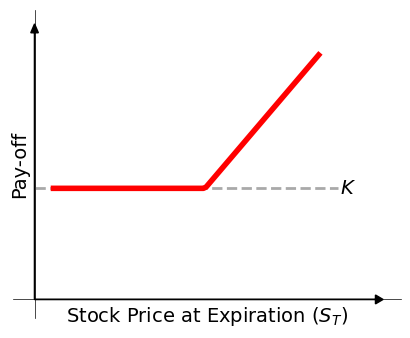

In [13]:
# parameters
K = 45  # Strike price
r = 0  # Risk-free rate
T = 1  # Time to maturity in years
S = np.linspace(5, 75, 100)  # Stock price at expiration

# Portfolio (as 1 & 2 are the same, plot only one)
call_payoff = np.maximum(S - K, 0)  # Call option pay-off
investment_payoff = K * np.exp(-r * T)  # Present value of K invested in the money-market
portfolio_1_payoff = call_payoff + investment_payoff - 20

# Plot
plt.figure(figsize=(5, 4))
plt.plot(S, portfolio_1_payoff, linewidth=4, label='Portfolio 1 & 2', zorder=3, color='red')
plt.xlabel('Stock Price at Expiration ($S_T$)', fontsize=14)
plt.ylabel('Pay-off', fontsize=14)
plt.xticks([])
plt.yticks([])

# Turning the axes into arrows
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.arrow(0, 0, 0, 60, head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(0, 0, 90, 0, head_width=2, head_length=2, fc='k', ec='k')

# K
plt.plot([0, 80], [25, 25], '--', linewidth=2, color='darkgrey')
plt.text(85, 25, "$K$", ha='right', va='center', fontsize=14)

plt.show()

The payoff diagram for both portfolios can be explained using the following table:

|  | $S_T < K$ | $S_T > K$ |
|--|-----------|-----------|
| Payoff portfolio 1 | $0 + K = K$ | $S_T - K + K = S_T$ |
| Payoff portfolio 2 | $K - S_T + S_T = K$ | $0 + S_T = S_T$ |

For portfolio 1, the investment in the money-market ensures that the payoff at $T$ will always equal $K$. Furthermore, as $S_T$ increases beyond $K$, the payoff for the call option increases linearly.

For portfolio 2, the put option offers downside protection. When the stock price is below the strike price, the put option's increasing value offsets the decreasing value of the stock. This essentially floors the payoff value at strike price.


## **Part II** <br/> Binomial Tree: *option valuation*

---

Consider a European call option on a non-dividend-paying stock with: 

| Parameter | Value |
|-----------|-------|
| Maturity ($T$) | 1y | 
| Strike price ($K$) | $99 |
| Interest rate ($r$) | 6% |
| Current stock price ($S_t$) | $100 |
| Volatility ($\sigma$) | 20% |

---

### **Question 2.1**

Write a binomial tree program to approximate the price of the option. Construct a tree with *50 steps* and explicitly state your option price approximation.

In [14]:
# parameters
T = 1
K = 99
r = 0.06
S_0 = 100
sigma = 0.2
N = 50

In [15]:
# binomial tree (50 steps)
binom_tree = BinomialTreeValuation(
    S = S_0, 
    vol = sigma, 
    T = T,
    N = N
)

In [16]:
# option price approximation
value_EU_call = binom_tree.value_option(
    r = r,
    K = K, 
    call_put = 'Call',
    option_type = 'EU'
)
print(f"Approximate European Call Price: ${value_EU_call:.2f}")

Approximate European Call Price: $11.55


---

### **Question 2.2**

Investigate how your binomial tree estimate compares to the analytical Black-Scholes value of the option. Do experiments for different values of the volatility.

In [142]:
# new parameters
sigmas = np.linspace(0.01, 1, 100)

binom_ests = []
bs_ests = []

In [143]:
# loop through sigmas and estimate approximation error
for sigma in sigmas:

    # binomial tree
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T = T, N=N)
    value_EU_call = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')
    binom_ests.append(value_EU_call)

    # black-scholes
    value_EU_call_bs = value_option_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
    bs_ests.append(value_EU_call_bs)

differences = np.abs(np.array(binom_ests) - np.array(bs_ests))

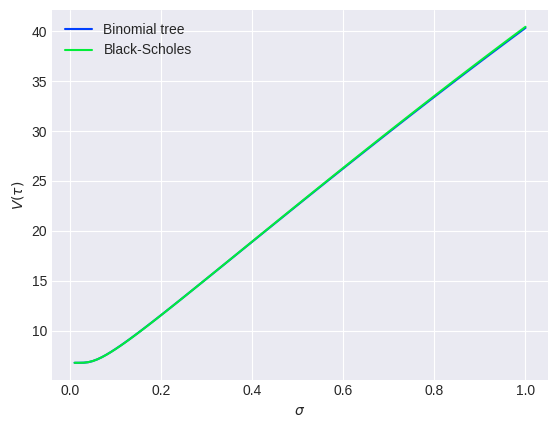

In [144]:
# plot results
plt.plot(sigmas, binom_ests, label='Binomial tree')
plt.plot(sigmas, bs_ests, label='Black-Scholes')
plt.xlabel('$\\sigma$')
plt.ylabel('$V(\\tau)$')
plt.legend()
plt.show()

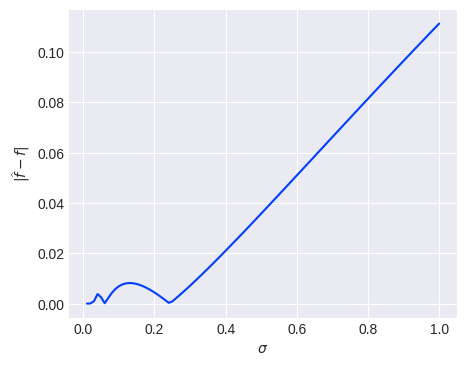

In [145]:
# plot the differences
plt.figure(figsize=(5, 4))
plt.plot(sigmas, differences)
plt.xlabel('$\\sigma$')
plt.ylabel('$|\\widehat{f}-f|$')
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_3245/1502870646.py:11: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$| \ \\widehat{f}-f \ |$', fontsize=14)


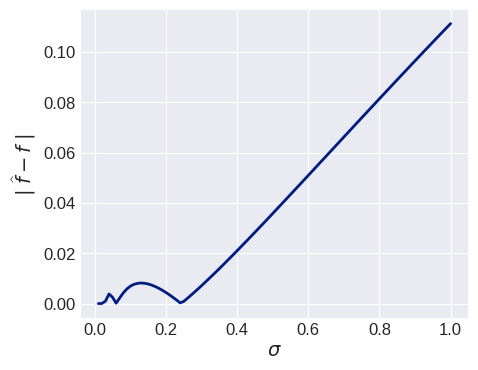

In [149]:
plt.figure(figsize=(5, 4))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.xlabel(fontsize=14)
# plt.ylabel(fontsize=14)
plt.style.use('seaborn-v0_8-darkgrid')

plt.plot(sigmas, differences, linestyle='-', linewidth=2, markersize=5, label='Estimation Error')

plt.xlabel('$\\sigma$', fontsize=14)
plt.ylabel('$| \ \\widehat{f}-f \ |$', fontsize=14)

plt.show()

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

---

### **Question 2.3**
Study the convergence of the method for increasing number of steps in the tree. What is the computational complexity of this algorithm as a function of the number of steps in the tree?

In [23]:
# new parameters
Ns = np.arange(1, 101)

binom_ests = []
bs_ests = []

In [24]:
# loop through number of steps and estimate approximation error
for N in Ns:
    
    # binomial tree
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
    value_EU_call = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')
    binom_ests.append(value_EU_call)

    # black-scholes
    value_EU_call_bs = value_option_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
    bs_ests.append(value_EU_call_bs)

differences = np.abs(np.array(binom_ests) - np.array(bs_ests))

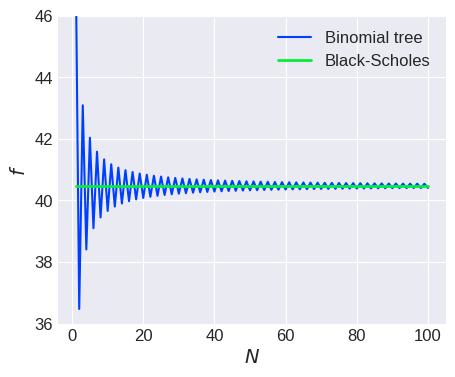

In [25]:
# plot results
plt.figure(figsize=(5, 4))
# plt.xlabel(fontsize=14)
# plt.ylabel(fontsize=14)
plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-darkgrid')

plt.plot(Ns, binom_ests, label='Binomial tree', linestyle='-', linewidth=1.5)
plt.plot(Ns, bs_ests, label='Black-Scholes', linestyle='-', linewidth=2)
plt.ylim(36, 46)
plt.xlabel('$N$', fontsize=14, fontweight='bold')
plt.ylabel('$f$', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_3245/3376026050.py:10: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$| \ \\widehat{f}-f \ |$', fontsize=14)


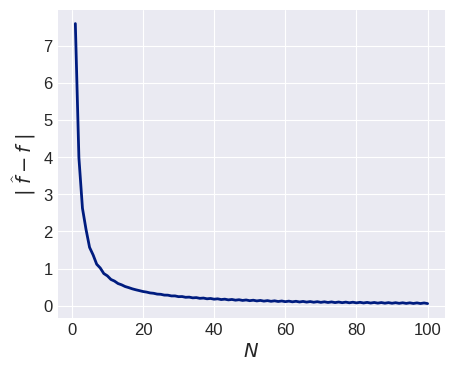

In [26]:
# plot the differences
plt.figure(figsize=(5, 4))
# plt.xlabel(fontsize=14)
# plt.ylabel(fontsize=14)
# plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-dark-palette')

plt.plot(Ns, differences, linestyle='-', linewidth=2)
plt.xlabel('$N$', fontsize=14)
plt.ylabel('$| \ \\widehat{f}-f \ |$', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

---

### **Question 2.4**
Compute the hedge parameter $\triangle$ from the binomial tree model at $t = 0$. Compare with the analytical Black-Scholes delta $\triangle_0 = N(d1)$. Experiment for different values of the volatility.

In [27]:
# new parameters
sigmas = np.linspace(0.01, 1.00, 100)

binomial_deltas = []
blackscholes_deltas = []

T = 1
K = 99
r = 0.06
S_0 = 100
sigma = 0.2
N = 50

In [28]:
# loop through sigmas to estimate hedge parameter and compare to black-scholes
for sigma in sigmas:
    
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
    payoff_tree, u, d = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU', as_tree=True)  # returns the payoff tree
    
    # up and down payoffs after one step
    f_u = payoff_tree[1][1]
    f_d = payoff_tree[1][0]

    # hedge parameter (binomial tree)    
    binomial_delta = hedge_parameter_binomial(fu=f_u, fd=f_d, S_0=S_0, u=u, d=d)
    binomial_deltas.append(binomial_delta)
    
    # hedge parameter (black-scholes)
    blackscholes_delta = hedge_parameter_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
    blackscholes_deltas.append(blackscholes_delta)

print(f"Binomial Deltas: {binomial_deltas}")
print(f"Black-Scholes Deltas: {blackscholes_deltas}")

differences = np.abs(np.array(binomial_deltas) - np.array(blackscholes_deltas))

Binomial Deltas: [0.9999999999999937, 0.9998569871488665, 0.9911871522965959, 0.9621327290002057, 0.9220202041144201, 0.8825306533060581, 0.8475310680565094, 0.8176598701962684, 0.7924701413668512, 0.7712583997882242, 0.7533427274532545, 0.7381394959530231, 0.7251712610068323, 0.7140538112816321, 0.7044791575273818, 0.6961998869608315, 0.689016239582237, 0.6827658826384724, 0.6773159626666001, 0.672556964604777, 0.6683979665907448, 0.6647629608085164, 0.6615879861087824, 0.6588188795956875, 0.6564095019581903, 0.6543203272804915, 0.6525173149392319, 0.6509710012059395, 0.6496557630788606, 0.6485492180026853, 0.647631731487365, 0.6468860109357087, 0.6462967687650435, 0.6458504415517685, 0.6455349547227913, 0.6453395244763658, 0.645254490290588, 0.6452711726873227, 0.6453817519473967, 0.645579164285648, 0.6458570126393854, 0.6462094897388232, 0.6466313115413461, 0.647117659444427, 0.6476641299618763, 0.6482666907674087, 0.6489216421891151, 0.6496255833851131, 0.6503753825523421, 0.651168

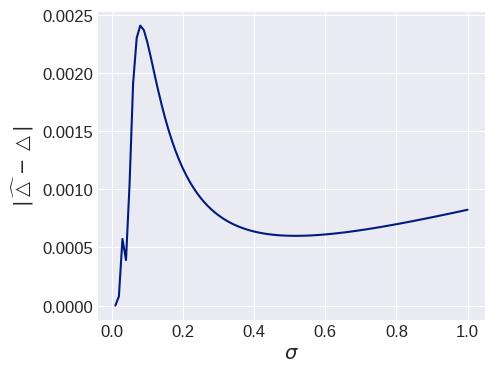

In [29]:
# plot the differences
plt.figure(figsize=(5, 4))
# plt.xlabel(fontsize=14)
# plt.ylabel(fontsize=14)
# plt.style.use('seaborn-v0_8-bright')
plt.style.use('seaborn-v0_8-dark-palette')
plt.style.use('seaborn-v0_8-darkgrid')

plt.plot(sigmas, differences)
plt.ylabel("$|\\widehat{\\triangle} - \\triangle |$", fontsize=14)
plt.xlabel("$\\sigma$", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

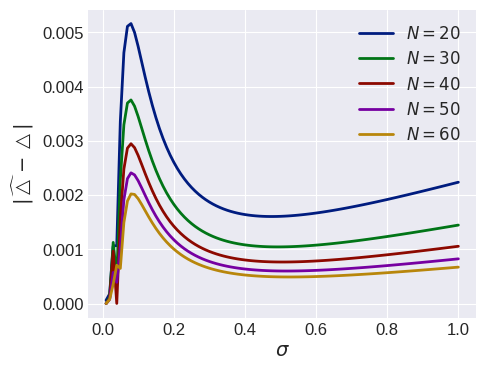

In [30]:
#Comparing hedge parameters 
sigmas = np.linspace(0.01, 1, 100)

binomial_deltas = []
blackscholes_deltas = []

Ns = np.arange(20, 70, 10) 

plt.figure(figsize=(5, 4))
# plt.xlabel(fontsize=14)
# plt.ylabel(fontsize=14)
plt.style.use('seaborn-v0_8-darkgrid')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

for N in Ns:
    
    for sigma in sigmas:

        binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
        payoff_tree, u, d = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU', as_tree=True)  # returns the payoff tree
    
        # up and down payoffs after one step
        f_u = payoff_tree[1][1]
        f_d = payoff_tree[1][0]
        
        # hedge parameter (binomial tree)    
        binomial_delta = hedge_parameter_binomial(fu=f_u, fd=f_d, S_0=S_0, u=u, d=d)
        binomial_deltas.append(binomial_delta)
        
        # hedge parameter (black-scholes)
        blackscholes_delta = hedge_parameter_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
        blackscholes_deltas.append(blackscholes_delta)


    differences = np.abs(np.array(binomial_deltas) - np.array(blackscholes_deltas))

    plt.plot(sigmas, differences, label=f"$N = {N}$", linewidth=2)
    #plt.yscale('log')
    
    binomial_deltas = []
    blackscholes_deltas = []

plt.ylabel("$|\\widehat{\\triangle} - \\triangle |$", fontsize=14)
plt.xlabel("$\\sigma$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

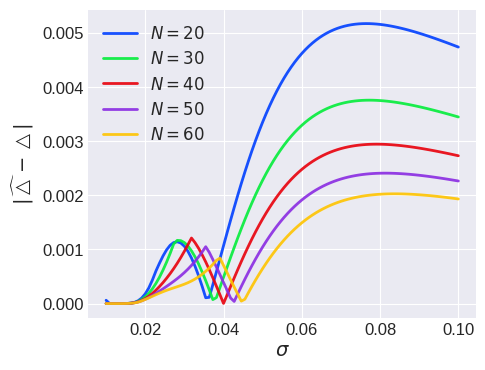

In [31]:
#Comparing hedge parameters 
sigmas = np.linspace(0.01, 0.1, 100)

binomial_deltas = []
blackscholes_deltas = []

Ns = np.arange(20, 70, 10) 

plt.figure(figsize=(5, 4))
# plt.xlabel(fontsize=14)
# plt.ylabel(fontsize=14)
plt.style.use('seaborn-v0_8-bright')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

for N in Ns:
    
    for sigma in sigmas:

        binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
        payoff_tree, u, d = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU', as_tree=True)  # returns the payoff tree

        # up and down payoffs after one step
        f_u = payoff_tree[1][1]
        f_d = payoff_tree[1][0]
        
        # hedge parameter (binomial tree)    
        binomial_delta = hedge_parameter_binomial(fu=f_u, fd=f_d, S_0=S_0, u=u, d=d)
        binomial_deltas.append(binomial_delta)
        
        # hedge parameter (black-scholes)
        blackscholes_delta = hedge_parameter_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
        blackscholes_deltas.append(blackscholes_delta)


    differences = np.abs(np.array(binomial_deltas) - np.array(blackscholes_deltas))

    plt.plot(sigmas, differences, label=f"$N = {N}$", linewidth=2, alpha=0.9)
    #plt.yscale('log')
    
    binomial_deltas = []
    blackscholes_deltas = []

plt.ylabel("$|\\widehat{\\triangle} - \\triangle |$", fontsize=14)
plt.xlabel("$\\sigma$", fontsize=14)
plt.legend(fontsize=12)
plt.show()





---

### **Question 2.5**

Now suppose that the option is American. What is the value of the American put and call for the corresponding parameters?

In [32]:
# new parameters
sigma = 0.2

In [33]:
# set up the binomial tree
binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)

In [34]:
# call price approximations
value_call_US = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='US')
print(f"Approximate American Call Price: ${value_call_US:.2f}")

value_call_EU = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')
print(f"Approximate European Call Price: ${value_call_EU:.2f}")

Approximate American Call Price: $11.55
Approximate European Call Price: $11.55


In [35]:
# put price approximations
value_put_US = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='US')
print(f"Approximate American Put Price: ${value_put_US:.2f}")

value_put_EU = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='EU')
print(f"Approximate European Put Price: ${value_put_EU:.2f}")

Approximate American Put Price: $5.35
Approximate European Put Price: $4.78


Experiment for different values of the volatility.

In [36]:
# new parameters
sigmas = np.linspace(0.01, 1, 100)

values_call_US = []
values_call_EU = []

values_put_US = []
values_put_EU = []        

In [37]:
# loop through sigmas to estimate approximation error
for sigma in sigmas:
    # set up the binomial tree
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
    
    # call price approximations
    value_call_US = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='US')
    value_call_EU = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')

    # put price approximations
    value_put_US = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='US')
    value_put_EU = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='EU')

    # add to lists
    values_call_US.append(value_call_US)
    values_call_EU.append(value_call_EU)
    values_put_US.append(value_put_US)
    values_put_EU.append(value_put_EU)

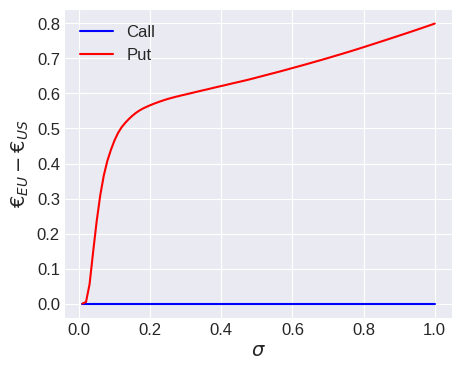

In [47]:
plt.figure(figsize=(5, 4))

# plt.title('Calls') 
# plt.plot(sigmas, values_call_EU, label='EU') 
# plt.plot(sigmas, values_call_US, label='US', color = 'red') 

# plt.title('Puts') 
plt.plot(sigmas, np.array(values_call_US) - np.array(values_call_EU), label='Call', color = 'blue')
plt.plot(sigmas, np.array(values_put_US) - np.array(values_put_EU), label='Put', color = 'red')
plt.ylabel("$€_{EU} - €_{US}$", fontsize=14)
plt.xlabel("$\\sigma$", fontsize=14)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

---

## **Part III** <br/> Black-Scholes: *hedging simulations*

---

### **Question 3.3**

Use the Euler method to perform a hedging simulation. Do an experiment where the volatility in the stock price process is matching the volatility used in the delta computation (set both equal to 20%).

In [81]:
# run the hedge simulations
profits_losses_weekly = run_hedge_simulations(
    n_simulations = 5000,
    S_0 = 100,
    K = 99,
    r = 0.06,
    stock_volatility = 0.2,
    delta_volatility = 0.2,
    T = 1,
    N = 1000,
    n_hedges = 53  # weekly hedges
)
print(f"Median profit/loss at t=T is {np.median(profits_losses):.2f}")

Median profit/loss at t=T is -0.00


In [116]:
# run the hedge simulations
profits_losses_monthly = run_hedge_simulations(
    n_simulations = 5000,
    S_0 = 100,
    K = 99,
    r = 0.06,
    stock_volatility = 0.2,
    delta_volatility = 0.2,
    T = 1,
    N = 1000,
    n_hedges = 13  # monthly hedges
)
print(f"Median profit/loss at t=T is {np.median(profits_losses):.2f}")

Median profit/loss at t=T is 0.01


Vary the frequency of the hedge adjustment (from daily to weekly) and explain the results.

In [83]:
# run the hedge simulations
profits_losses = run_hedge_simulations(
    n_simulations = 5000,
    S_0 = 100,
    K = 99,
    r = 0.06,
    stock_volatility = 0.2,
    delta_volatility = 0.2,
    T = 1,
    N = 1000,
    n_hedges = 366  # daily hedges
)
print(f"Median profit/loss at t=T is {np.median(profits_losses):.2f}")

Median profit/loss at t=T is 0.01


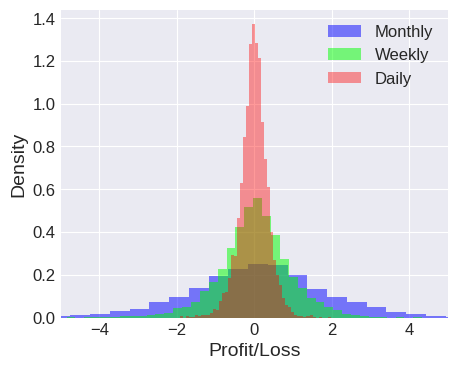

In [182]:
# PLOT BOTH DAILY & WEEKLY HEDGE SIMULATIONS
median_value_daily = np.median(profits_losses)
median_value_weekly = np.median(profits_losses_weekly)
median_value_monthly = np.median(profits_losses_monthly)

plt.figure(figsize=(5, 4))

# Plot histogram for daily hedges
plt.hist(profits_losses_monthly, bins=40, alpha=0.5, label='Monthly', color='blue', density=True)
plt.hist(profits_losses_weekly, bins=40, alpha=0.5, label='Weekly', color='lime', density=True)
plt.hist(profits_losses, bins=50, alpha=0.4, label='Daily', color='red', density=True)

# Add vertical lines for means and medians
# plt.axvline(median_value_monthly, color='blue', linestyle='dashed', linewidth=1, label=f'Median (Monthly): {median_value_monthly:.2f}')
# plt.axvline(median_value_weekly, color='lime', linestyle='dashed', linewidth=1, label=f'Median (Weekly): {median_value_weekly:.2f}')
# plt.axvline(median_value_daily, color='red', linestyle='dashed', linewidth=1, label=f'Median (Daily): {median_value_daily:.2f}')

plt.xlabel('Profit/Loss', fontsize=14)
plt.ylabel('Density', fontsize=14)
# plt.title('$\mathbf{{\\sigma}_{S} = {\\sigma}_{\\triangle}}$', fontsize=16)
plt.legend(fontsize=12)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.xlim(-5, 5)

plt.show()


Perform numerical experiments where the volatility in the stock price process is not matching the volatility used in the delta valuation. Experiment for various levels and explain the results.

In [151]:
# run the hedge simulations
profits_losses_daily_underest = run_hedge_simulations(
    n_simulations = 5000,
    S_0 = 100,
    K = 99,
    r = 0.06,
    stock_volatility = 0.2,
    delta_volatility = 0.1,
    T = 1,
    N = 1000,
    n_hedges = 366  # daily hedges
)
print(f"Median profit/loss at t=T is {np.median(profits_losses):.2f}")

Median profit/loss at t=T is 0.01


In [152]:
# run the hedge simulations
profits_losses_daily_overest = run_hedge_simulations(
    n_simulations = 5000,
    S_0 = 100,
    K = 99,
    r = 0.06,
    stock_volatility = 0.2,
    delta_volatility = 0.3,
    T = 1,
    N = 1000,
    n_hedges = 366  # daily hedges
)
print(f"Median profit/loss at t=T is {np.median(profits_losses):.2f}")

Median profit/loss at t=T is 0.01


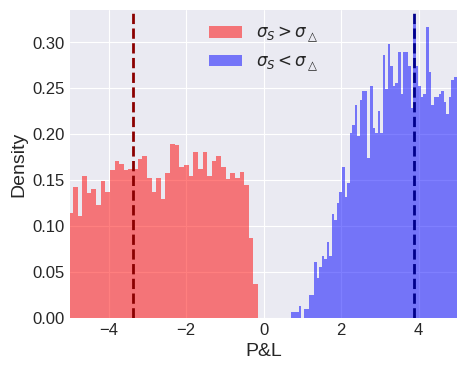

In [181]:
# PLOT BOTH DAILY & WEEKLY HEDGE SIMULATIONS
median_value_normal = np.median(profits_losses)
median_value_underest = np.median(profits_losses_daily_underest)
median_value_overest = np.median(profits_losses_daily_overest)

plt.figure(figsize=(5, 4))

# Plot histogram for daily hedges
plt.hist(profits_losses_daily_underest, bins=100, alpha=0.5, label='${\\sigma}_{S} > {\\sigma}_{\\triangle}$', color='red', density=True)
plt.hist(profits_losses_daily_overest, bins=100, alpha=0.5, label='${\\sigma}_{S} < {\\sigma}_{\\triangle}$', color='blue', density=True)
# plt.hist(profits_losses, bins=100, alpha=0.4, label='Daily Hedges', color='red', density=True)
plt.legend(fontsize=12)

# Add vertical lines for means and medians
plt.axvline(median_value_underest, color='darkred', linestyle='dashed', linewidth=2, label=f'Median (underest): {median_value_underest:.2f}')
plt.axvline(median_value_overest, color='darkblue', linestyle='dashed', linewidth=2, label=f'Median (overest): {median_value_overest:.2f}')
# plt.axvline(median_value_normal, color='red', linestyle='dashed', linewidth=1, label=f'Median (Daily): {median_value_normal:.2f}')
# plt.text(median_value_underest + 0.15, plt.ylim()[1]*0.6, f'median: {median_value_underest:.2f}', color='darkred', fontsize=12)
# plt.text(median_value_overest - 0.15, plt.ylim()[1]*0.6, f'median: {median_value_underest:.2f}', color='darkblue', fontsize=13, ha='right', fontweight='bold')

plt.xlabel('P&L', fontsize=14)
plt.ylabel('Density', fontsize=14)
# plt.title('$\mathbf{{\\sigma}_{S} = {\\sigma}_{\\triangle}}$', fontsize=16)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.xlim(-5, 5)

plt.show()


---